# Predicting using supervised ML
Predict the percentage of an student based on the no.of study hours and how they studied
It is based on linear regression task as it involves just 2 variables

##Author-Pellakuru Sumanth Reddy

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [13]:
#Reding the data
data=pd.read_csv('Students_list.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,1.5,75
4,9.2,30
5,5.5,20
6,8.3,88
7,2.7,60
8,7.7,81


In [14]:
#Check if there any null value in the Dataset
data.isnull == True

False

### There is no null value in the Dataset so,we can visualize our data

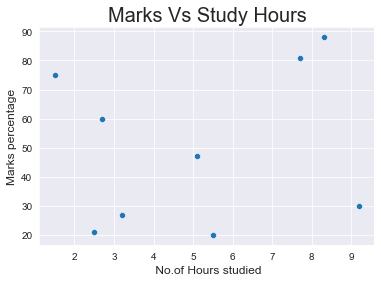

In [15]:
sns.set_style('darkgrid')
sns.scatterplot(y=data['Scores'], x=data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks percentage',size=12)
plt.xlabel(' No.of Hours studied',size=12)
plt.show()

#### From the above Analysis we can observe there is a correlation between Marks and Hours,So we need to apply regression to confirm the correlation between two variables 

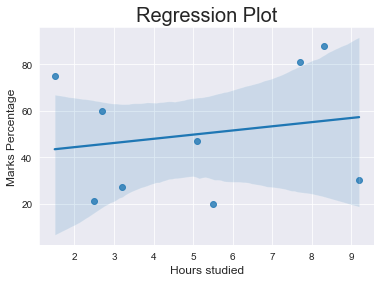

          Hours   Scores
Hours   1.00000  0.18717
Scores  0.18717  1.00000


In [16]:
sns.regplot(x=data['Hours'],y=data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage',size=12)
plt.xlabel('Hours studied',size=12)
plt.show()
print(data.corr())

#### it is Confirmed that the variables are positively correlated

# Training the Data

### 1) Splitting the Data

In [19]:
#Defining the x and y from the data
x=data.iloc[:,:-1].values
y=data.iloc[:, 1].values

#splitting the Data in two
train_x, val_x,train_y,val_y=train_test_split(x,y, random_state=0)

## 2) Fitting the Data into the model

In [20]:
regression =LinearRegression()
regression.fit(train_x,train_y)
print("Model is Trained")

Model is Trained


# Predicting the Percentage of Marks

In [24]:
pred_y=regression.predict(val_x)
prediction=pd.DataFrame({'Hours':[i[0] for i in val_x], 'Predicted Marks':[k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,2.7,47.449808
1,3.2,48.268758
2,5.1,51.380768


## Comparing the Predicted Marks with the Actual Marks

In [26]:
compare_scores=pd.DataFrame({'Actual Marks':val_y, 'Predicted Marks':pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,60,47.449808
1,27,48.268758
2,47,51.380768


## Visually Comparing the Predicted Marks with the Actual Marks

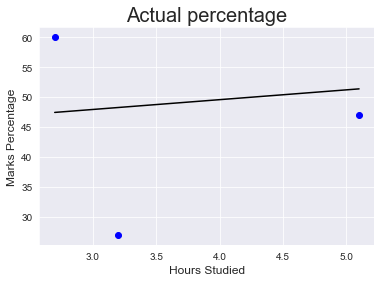

In [27]:
plt.scatter(x=val_x,y=val_y,color='blue')
plt.plot(val_x,pred_y,color='Black')
plt.title('Actual percentage',size=20)
plt.ylabel('Marks Percentage',size=12)
plt.xlabel('Hours Studied',size=12)
plt.show()

# Evaluating the model

In [28]:
#calculate the accuracy of model
print('Mean absolute error:',mean_absolute_error(val_y,pred_y))


Mean absolute error: 12.733239445845477


#### Small value of mean indicates that the chances of error or wrong forecating through the model are very less

## What will be the predicted score of a student if he/she studies for 9.25hrs.day?

In [29]:
hours=[9.25]
answer=regression.predict([hours])
print("Score ={}".format(round(answer[0],3)))

Score =58.178


#### the Score is 58.178

### from the above analysis of regression model if a student studies for 9.25 hours a day he/she is likely to score 58.12 marks